In [1]:
import numpy as np
from scipy.interpolate import interp1d

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D

### Set plot params

In [2]:
# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

## Auxiliary functions

In [3]:
def sign_choose():
    return -1 if np.random.random() > 0.5 else 1

In [4]:
def boltzmann(r, r_0, C):
    return r_0 ** np.exp(-C*r) - 1

### Plot Boltzmann distribution

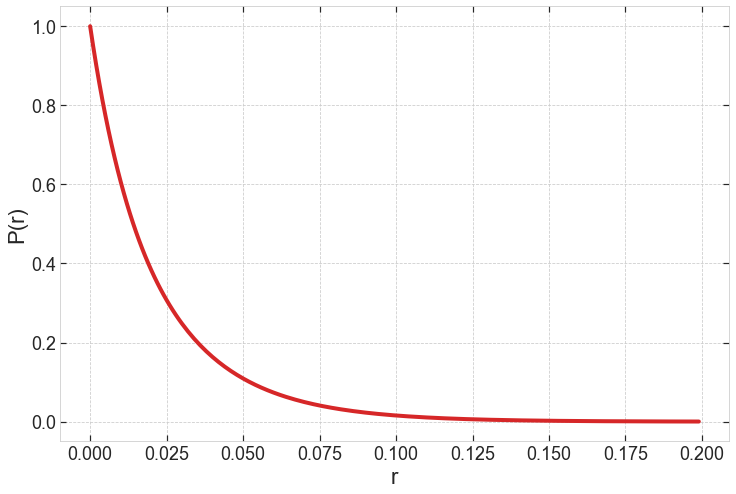

In [41]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca()

axislabelsize = 22
axisticksize = 18

X = np.arange(0,0.2,0.001)
ax.plot(X, boltzmann(X, r_0=2, C=38),
        color='tab:red', lw=4)

ax.set_xlabel('r', fontsize=axislabelsize)
ax.set_ylabel('P(r)', fontsize=axislabelsize)
ax.tick_params(axis='both', which='major', labelsize=axisticksize)

plt.show()

### Generate points according to Boltzmann distribution on 2D plane

In [52]:
def choose_color(d, side_L):
    start = 0.25
    stop = 1.0
    if d < side_L:
        m = interp1d([0, side_L], [start, stop])
        return cm.viridis(m(d))
    else:
        return cm.viridis(stop)

In [53]:
# Number of random points
n_points = 2000

# Array to store xy coordinates of points
points = np.zeros((n_points,2))
# Color array for more SPECTACULAR view
colors = []

# Side length of plotted region
side_L = 0.2

# Points chosen so far
n = 0
while n < n_points:
    x = np.random.random() * side_L * sign_choose()
    y = np.random.random() * side_L * sign_choose()
    v = np.random.random()
    
    # Distance from center
    d = np.sqrt(x**2+y**2)
    
    if v < boltzmann(d, r_0=2, C=38):
        points[n][0] = x
        points[n][1] = y    
        colors.append(choose_color(d, side_L))#*np.sqrt(2)))
        n += 1
colors = np.array(colors)

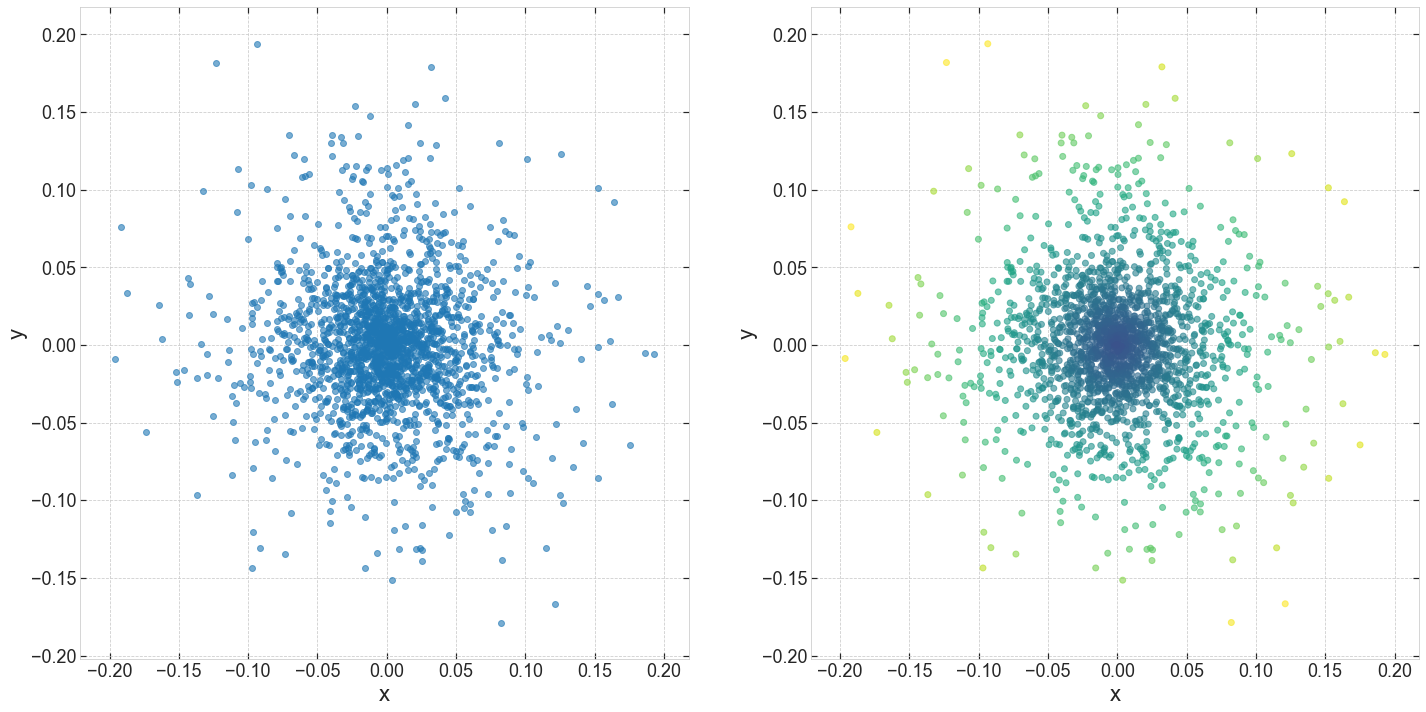

In [55]:
nrows = 1
ncols = 2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*12,nrows*12))

axislabelsize = 22
axisticksize = 18
scatterradius = 6

ax[0].scatter(points[:,0], points[:,1],
              color='tab:blue', s=scatterradius**2, alpha=0.6)

ax[1].scatter(points[:,0], points[:,1],
              color=colors, s=scatterradius**2, alpha=0.6)

for i in range(ncols):
    ax[i].set_xlabel('x', fontsize=axislabelsize)
    ax[i].set_ylabel('y', fontsize=axislabelsize)
    ax[i].tick_params(axis='both', which='major', labelsize=axisticksize)

plt.show()

### Generate random peaks on a grid surface according to Boltzmann distribution

In [47]:
# Generate gridpoint values
step = 0.01
coords = np.arange(-2,2+step,step)
# Grid coordinates
# X contains x coordinates of gridpoints
# Y contains y coordinates of gridpoints
X, Y = np.meshgrid(coords, coords)
# Values in gridpoints
Z = np.zeros(X.shape)

# Number of random peaks
n_peaks = 10
# Height of peaks
peak_height = 100

# Peaks chosen so far
n = 0
while n < n_peaks:
    x = np.random.choice(coords)
    y = np.random.choice(coords)
    v = np.random.random()
    if v < boltzmann(np.sqrt(x**2+y**2), r_0=2, C=38):
        x_coord = np.where(coords == x)[0][0]
        y_coord = np.where(coords == y)[0][0]
        Z[x_coord][y_coord] = peak_height
        n += 1

Attól, hogy itt valamiért (nem tudom miért, ne kérdezd) szarul néz ki, még teljesen jól kicserél random pontokat egy 2D gridben valamilyen értékre, méghozzá Boltzmann-eloszlás szerint.

In [56]:
np.where(Z == peak_height)

(array([187, 195, 198, 199, 199, 200, 201, 202, 202, 203], dtype=int64),
 array([188, 197, 200, 199, 201, 208, 194, 197, 203, 191], dtype=int64))

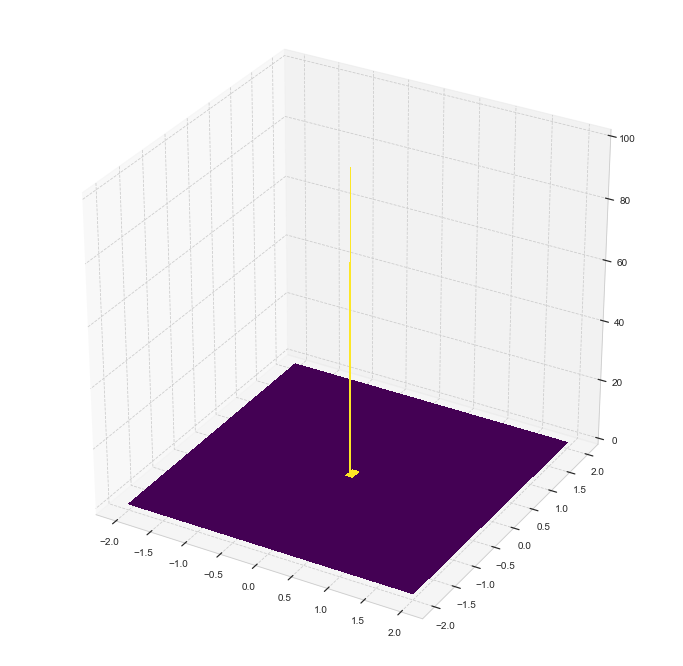

In [48]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis,
                       linewidth=0, antialiased=False)

plt.show()